<a href="https://colab.research.google.com/github/GiovanniReguzzoni/modelliNLP/blob/main/analisi%2BbaselineITAfalseNEWS.ipynb" target="_parent"><img src="https://colab.research.google.com/assets/colab-badge.svg" alt="Open In Colab"/></a>

In [ ]:
import pandas as pd
import numpy as np
import re
import string
import csv

In [ ]:
import seaborn as sns
from pylab import rcParams
import matplotlib.pyplot as plt
from matplotlib import rc


sns.set(style='whitegrid', palette='muted', font_scale=1.2)

HAPPY_COLORS_PALETTE = ["#01BEFE", "#FFDD00", "#FF7D00", "#FF006D", "#ADFF02", "#8F00FF"]

sns.set_palette(sns.color_palette(HAPPY_COLORS_PALETTE))

rcParams['figure.figsize'] = 12, 8

In [ ]:
dftest = pd.read_feather('/content/testNewsFEA')

In [ ]:
dftrain = pd.read_feather('/content/trainNewsFEA')
dftestl = pd.read_feather('/content/testNewsGoldFEA')

In [ ]:
print("Dimensioni dataframe di train:" )
print(dftrain.shape)
print("Dimensioni dataframe di test:")
print(dftestl.shape)


Dimensioni dataframe di train:
(10879, 2)
Dimensioni dataframe di test:
(2720, 2)


In [ ]:
dftestl.shape

(2720, 2)

In [ ]:
print("Informazioni dataframe di train: \n")
dftrain.info()

Informazioni dataframe di train: 

<class 'pandas.core.frame.DataFrame'>
RangeIndex: 10879 entries, 0 to 10878
Data columns (total 2 columns):
 #   Column  Non-Null Count  Dtype 
---  ------  --------------  ----- 
 0   text    10879 non-null  object
 1   label   10879 non-null  int64 
dtypes: int64(1), object(1)
memory usage: 170.1+ KB


In [ ]:
print("Informazioni dataframe di test: \n")
dftestl.info()

Informazioni dataframe di test: 

<class 'pandas.core.frame.DataFrame'>
RangeIndex: 2720 entries, 0 to 2719
Data columns (total 2 columns):
 #   Column  Non-Null Count  Dtype 
---  ------  --------------  ----- 
 0   text    2720 non-null   object
 1   label   2720 non-null   int64 
dtypes: int64(1), object(1)
memory usage: 42.6+ KB


In [ ]:
dftrain.head(5)

,text,label
0,Se fosse toccato a me?,0
1,ENORMI oggetti sferici vengono FILMATI vicino ...,1
2,SERVONO 1550 POSTINI:POSTE ITALIANE ASSUME IN ...,1
3,"Napoli, neomelodico canta al contrario: boom d...",1
4,"Papa Francesco: “Non date ascolto a Renzi, il ...",1


In [ ]:
dftrain.sample(frac=1)

,text,label
5859,Prato. Elettricista folgorato da una duevventi...,1
7154,Ed è perfino il primo classificato.,0
2732,"PEGASUS PROJECT, la Tecnologia degli Stargate ...",1
8313,Con l’avanzamento tecnologico sarà sempre più ...,0
4022,Michio Kaku: “Un giorno la specie Umana migrer...,1
...,...,...
3663,"Parla il figlio del petroliere: “Italiani, gra...",1
4439,Un taglio che si può portare liscio oppure mos...,0
4512,"Sanremo, Carlo Conti: “Dono il mio compenso ai...",1
9588,Nella giornata di ieri MPS ha diffuso i conti ...,0


/usr/local/lib/python3.7/dist-packages/seaborn/_decorators.py:43: FutureWarning: Pass the following variable as a keyword arg: x. From version 0.12, the only valid positional argument will be `data`, and passing other arguments without an explicit keyword will result in an error or misinterpretation.
  FutureWarning


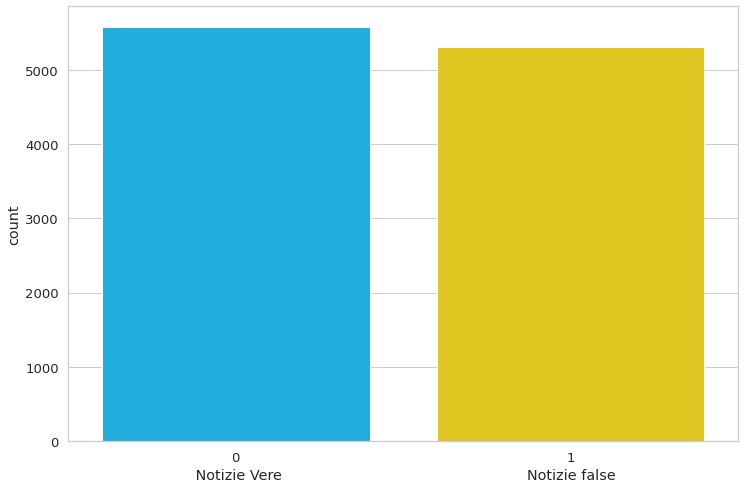

In [ ]:
sns.countplot(dftrain.label)
plt.xlabel(' Notizie Vere                                                     Notizie false');

In [ ]:
contatoreHate=dftrain['label'].value_counts()

print ("Totale testi di notizie di train: 10879")
print("Notizie vere: ", contatoreHate[0])
print("Notizie false: ", contatoreHate[1])

Totale testi di notizie di train: 10879
Notizie vere:  5575
Notizie false:  5304


In [ ]:
import numpy

numpy.random.seed(0)


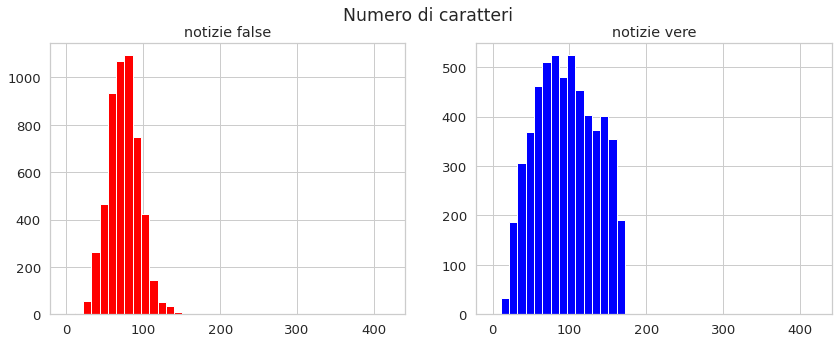

In [ ]:
#numero di caratteri in ogni messaggio

fig,(ax1,ax2)=plt.subplots(1,2,figsize=(14,5))

bins = np.linspace(0,420, 40)

testo_len=dftrain[dftrain['label']==1]['text'].str.len()
ax1.hist(testo_len, bins, color='red')
ax1.set_title('notizie false')

testo_len=dftrain[dftrain['label']==0]['text'].str.len()
ax2.hist(testo_len, bins, color='blue')
ax2.set_title('notizie vere')
fig.suptitle('Numero di caratteri')
plt.show()

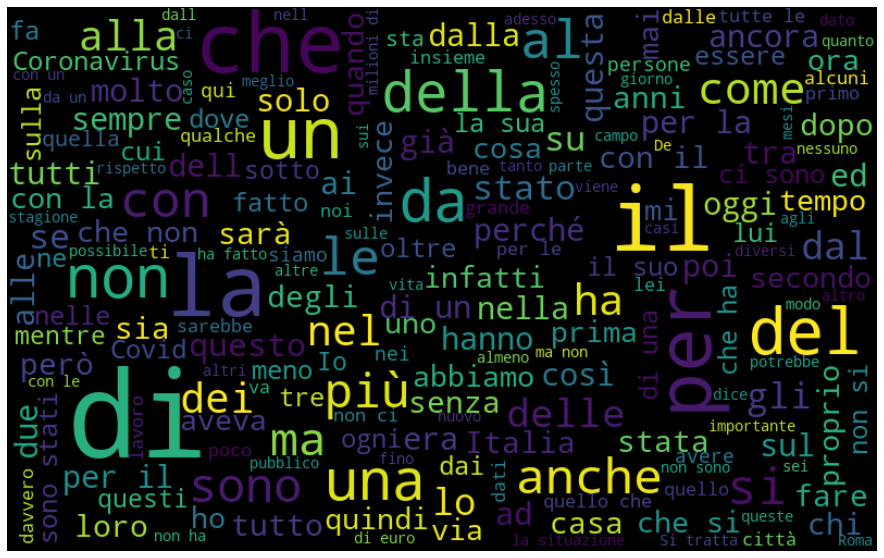

In [ ]:
#wordcloud notizie vere

all_words = ' '.join([text for text in dftrain['text'][dftrain['label']==0]])
from wordcloud import WordCloud
wordcloud = WordCloud(width=800, height=500, random_state=21, max_font_size=110).generate(all_words)

plt.figure(figsize=(16, 10))
plt.imshow(wordcloud, interpolation="bilinear")
plt.axis('off')
plt.show()

In [ ]:
from collections import  Counter

DATACLEANING


In [ ]:
def cleaning (testo):
    
    # elimina dal testo punteggiatura, link html, 
    testo = re.sub('\[.*?\]', '', testo)
    testo = re.sub('https?://\S+|www\.\S+', '', testo)
    testo = re.sub('<.*?>+', '', testo)
    testo = re.sub('[%s]' % re.escape(string.punctuation), '', testo)
    testo = re.sub('\n', '', testo)
    testo = re.sub('\w*\d\w*', '', testo)

    # in minuscolo tutte le lettere
    testo = testo.lower()

    return testo

In [ ]:
dftrain['text'] = dftrain['text'].apply(lambda x: cleaning(x))
dftestl['text'] = dftestl['text'].apply(lambda x: cleaning(x))

In [ ]:
dftrain.head(5)

,text,label
0,se fosse toccato a me,0
1,enormi oggetti sferici vengono filmati vicino ...,1
2,servono postiniposte italiane assume in tutta...,1
3,napoli neomelodico canta al contrario boom di ...,1
4,papa francesco “non date ascolto a renzi il po...,1


STOP WORDS

In [ ]:
import nltk
nltk.download('stopwords')

[nltk_data] Downloading package stopwords to /root/nltk_data...
[nltk_data]   Package stopwords is already up-to-date!


True

In [ ]:
from collections import defaultdict
from nltk.corpus import stopwords

In [ ]:
from nltk.corpus import stopwords
stop = stopwords.words('italian')

dftrain['text'] = dftrain['text'].apply(lambda x: ' '.join([word for word in x.split() if word not in (stop)]))
dftestl['text'] = dftestl['text'].apply(lambda x: ' '.join([word for word in x.split() if word not in (stop)]))

In [ ]:
dftrain.sample(frac=1)

,text,label
1192,boschi “licei artistici rovina città”,1
7086,ruolo proprio accendere ogni evento invitata p...,0
2053,professionalità devono essere lasciate sole,0
4972,cecile fa ultimo tentativo speranza fargli cam...,0
5776,smartphone torna utile restare informati parti...,0
...,...,...
1177,teologi rivelano “gesù cane nome ebaù”,1
2969,olidata comunicato aver versato titolo rilasci...,0
3786,cosa portato canzone quel sanremo quellalbum oggi,0
7229,raz degan “amo ancora paola dopo nessun’altra ...,1


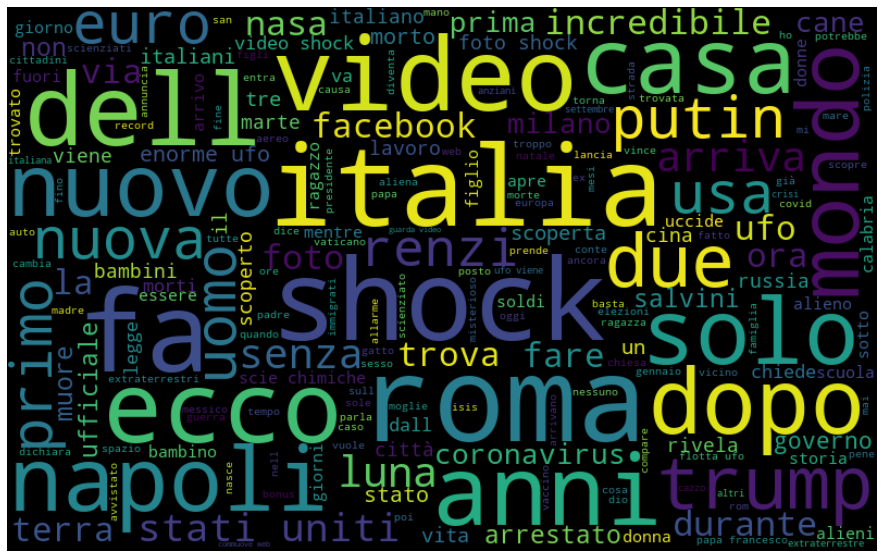

In [ ]:
#word cloud notize false senza stop word

all_words = ' '.join([text for text in dftrain['text'][dftrain['label']==1]])
from wordcloud import WordCloud
wordcloud = WordCloud(width=800, height=500, random_state=21, max_font_size=110).generate(all_words)

plt.figure(figsize=(16, 10))
plt.imshow(wordcloud, interpolation="bilinear")
plt.axis('off')
plt.show()

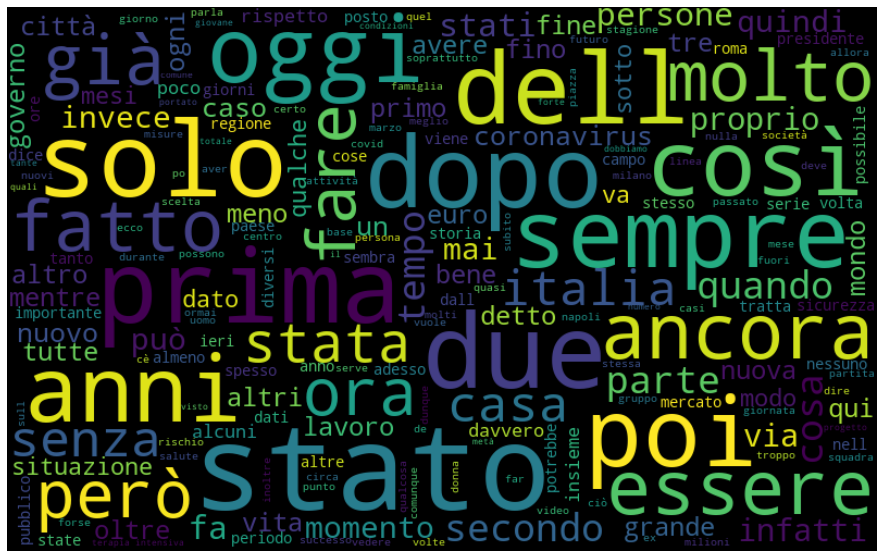

In [ ]:
#word cloud notize vere senza stopoword

all_words = ' '.join([text for text in dftrain['text'][dftrain['label']==0]])
from wordcloud import WordCloud
wordcloud = WordCloud(width=800, height=500, random_state=21, max_font_size=110).generate(all_words)

plt.figure(figsize=(16, 10))
plt.imshow(wordcloud, interpolation="bilinear")
plt.axis('off')
plt.show()

TOKENIZATION


In [ ]:
import nltk

In [ ]:
tokenizer = nltk.tokenize.RegexpTokenizer(r'\w+')

dftrain['text'] = dftrain['text'].apply(lambda x: tokenizer.tokenize(x))
dftest['text'] = dftest['text'].apply(lambda x: tokenizer.tokenize(x))

In [ ]:
dftrain.head(5)

,text,label
0,"[toccato, me]",0
1,"[enormi, oggetti, sferici, vengono, filmati, v...",1
2,"[servono, postiniposte, italiane, assume, tutt...",1
3,"[napoli, neomelodico, canta, contrario, boom, ...",1
4,"[papa, francesco, non, date, ascolto, renzi, p...",1


In [ ]:
dftrain.sample(frac=1)

,text,label
9311,"[ora, è, costretta, a, diventare, formica]",0
8043,"[conte, lo, avrebbe, voluto, già, estate, figu...",0
376,"[muoversi, per, tempo, è, comunque, già, di, p...",0
7784,"[lesa, la, credibilità, di, striscia, la, noti...",1
3926,"[una, strada, quella, delle, collaborazioni, a...",0
...,...,...
4284,"[brasile, prandelli, se, perdiamo, tutti, a, t...",1
9503,"[anonymous, trovano, il, collo, di, maurizio, ...",1
5868,"[isole, svalbard, un, ufo, a, forma, di, sigar...",1
857,"[resta, consentita, l, attività, di, consegna,...",0


STEMMING

In [ ]:
from nltk.stem.snowball import SnowballStemmer
stemmer = SnowballStemmer("italian")

In [ ]:
from nltk.stem.snowball import SnowballStemmer
stemmer = SnowballStemmer("italian")
dftrain['testoStem'] = dftrain['text'].apply(lambda x : [stemmer.stem(y) for y in x])
dftestl['testoStem'] = dftestl['text'].apply(lambda x : [stemmer.stem(y) for y in x])

In [ ]:
dftrain.head(5)

,text,label,testoStem
0,"[toccato, me]",0,"[tocc, me]"
1,"[enormi, oggetti, sferici, vengono, filmati, v...",1,"[enorm, oggett, sferic, veng, film, vicin, sol]"
2,"[servono, postiniposte, italiane, assume, tutt...",1,"[serv, postinipost, italian, assum, tutt, ital..."
3,"[napoli, neomelodico, canta, contrario, boom, ...",1,"[napol, neomelod, cant, contrar, boom, richies..."
4,"[papa, francesco, non, date, ascolto, renzi, p...",1,"[pap, francesc, non, dat, ascolt, renz, post, ..."


# MODELLO

In [ ]:
dftrain = pd.read_feather('/content/trainNewsFEA')
dftestl = pd.read_feather('/content/testNewsGoldFEA')

In [ ]:
dftrain['text'] = dftrain['text'].apply(lambda x: cleaning(x))
dftestl['text'] = dftestl['text'].apply(lambda x: cleaning(x))

In [ ]:
from nltk.corpus import stopwords
stop = stopwords.words('italian')

dftrain['text'] = dftrain['text'].apply(lambda x: ' '.join([word for word in x.split() if word not in (stop)]))
dftestl['text'] = dftestl['text'].apply(lambda x: ' '.join([word for word in x.split() if word not in (stop)]))

In [ ]:
from nltk.stem.snowball import SnowballStemmer
stemmer = SnowballStemmer("italian")
dftrain['testoStem'] = dftrain['text'].apply(lambda x : [stemmer.stem(y) for y in x])
dftestl['testoStem'] = dftestl['text'].apply(lambda x : [stemmer.stem(y) for y in x])

In [ ]:
#split train in train e validation
from sklearn.model_selection import train_test_split

In [ ]:
from sklearn.model_selection import train_test_split
X_train, X_test, y_train, y_test = train_test_split (dftrain.text, dftrain.label, test_size=0.33, random_state=42)

In [ ]:
X_train.shape

(7288,)

In [ ]:
X_train

10168             roma innamora chiamando numero autogrill
3557     “affari tuoi” chiede concorrente vuole cambiar...
4609     nasa nascosto “misteriosa musica” ascoltata lu...
10141    maradona lasciato ore senza soccorsi duro comu...
118      variante delta plus arriva italia rischio chiu...
                               ...                        
5734     telecamere iss registrano “flotta ufo” stazion...
5191     gf vip rita rusic diretta instagram parla cliz...
5390     così capace spronato reinventarsi sempre carat...
860      microchip sottocutaneo ecco strana pubblicità ...
7270     apollo regista stanley kubrick falsificato par...
Name: text, Length: 7288, dtype: object

In [ ]:
from sklearn.feature_extraction.text import TfidfVectorizer

tfidf = TfidfVectorizer(min_df=2, max_df=0.5, ngram_range=(1, 2))
train_tfidf = tfidf.fit_transform(dftrain['text'])

X_train_tfidf = tfidf.transform(X_train)
X_test_tfidf = tfidf.transform(X_test)
test_tfidf = tfidf.transform(dftestl['text'])

In [ ]:
test_tfidf = tfidf.transform(dftestl['text'])


In [ ]:
X_train_tfidf

<7288x13399 sparse matrix of type '<class 'numpy.float64'>'
	with 57756 stored elements in Compressed Sparse Row format>

In [ ]:
print(X_train_tfidf)

  (0, 10219)	0.41076017980126084
  (0, 7720)	0.5651556671384232
  (0, 1064)	0.7154545035087553
  (1, 13302)	0.2604877203429973
  (1, 11038)	0.356257914262777
  (1, 10212)	0.36389687615817956
  (1, 10211)	0.3497992640073844
  (1, 8066)	0.3852995975026094
  (1, 2520)	0.34420452667606855
  (1, 2100)	0.26742249268096063
  (1, 1697)	0.3058135096785146
  (1, 164)	0.34420452667606855
  (2, 7493)	0.3731377171320977
  (2, 7469)	0.27798489523450554
  (2, 7431)	0.32323854407467784
  (2, 7161)	0.3131033227609112
  (2, 6535)	0.2759355167306333
  (2, 3179)	0.41768716295629016
  (2, 3170)	0.20732414556113174
  (2, 947)	0.3944853687788685
  (2, 695)	0.36300249581833105
  (3, 12578)	0.28600066155036125
  (3, 11141)	0.39734059053530324
  (3, 10874)	0.24599751094561237
  (3, 7953)	0.26976663756352687
  :	:
  (7284, 3455)	0.25892159735449977
  (7284, 3454)	0.18895735689194051
  (7284, 2833)	0.1820557670080483
  (7284, 2808)	0.1499252942422
  (7284, 2278)	0.25892159735449977
  (7285, 13302)	0.3280358160794

In [ ]:
X_test_tfidf

<3591x13399 sparse matrix of type '<class 'numpy.float64'>'
	with 28525 stored elements in Compressed Sparse Row format>

In [ ]:
test_tfidf

<2720x13399 sparse matrix of type '<class 'numpy.float64'>'
	with 18847 stored elements in Compressed Sparse Row format>

In [ ]:
from sklearn.linear_model import LogisticRegression
from sklearn import model_selection
ModelloLogisticRegression = LogisticRegression()
ModelloLogisticRegression.fit(X_train_tfidf,y_train)

LogisticRegression()

In [ ]:
ModelloLogisticRegression = LogisticRegression()
ModelloLogisticRegression.fit(X_train_tfidf,y_train)

LogisticRegression()

In [ ]:
predizioneValModelloLogisticRegression = ModelloLogisticRegression.predict(X_test_tfidf)

In [ ]:
predizioneFinModelloLogisticRegression = ModelloLogisticRegression.predict(test_tfidf)

In [ ]:
#controllo accuratezza sul dataset di validation

predizioneValModelloLogisticRegression = ModelloLogisticRegression.predict(X_test_tfidf)
from sklearn import metrics
metrics.accuracy_score(y_test, predizioneValModelloLogisticRegression)

0.8526872737399053

In [ ]:
predizioneFinModelloLogisticRegression = ModelloLogisticRegression.predict(test_tfidf)

In [ ]:
#controllo accuratezza sul dataset di test
predizioneFinModelloLogisticRegression = ModelloLogisticRegression.predict(test_tfidf)
from sklearn import metrics
metrics.accuracy_score(dftestl['label'], predizioneFinModelloLogisticRegression)

0.8551470588235294

In [ ]:
#precision

from sklearn.metrics import precision_score
precision_score(dftestl['label'], predizioneFinModelloLogisticRegression,  average='macro')

0.8553029072600292

In [ ]:
from sklearn.metrics import f1_score
#f1
f1_score(dftestl['label'], predizioneFinModelloLogisticRegression,  average='macro')

0.8550397650510136

In [ ]:
from sklearn.metrics import recall_score
#recall
recall_score(dftestl['label'], predizioneFinModelloLogisticRegression,  average='macro')

0.8549331971894362

In [ ]:
from sklearn.metrics import confusion_matrix
array=confusion_matrix(dftestl['label'], predizioneFinModelloLogisticRegression,)
# (tn, fp, fn, tp)
array

array([[1222,  162],
       [ 232, 1104]])

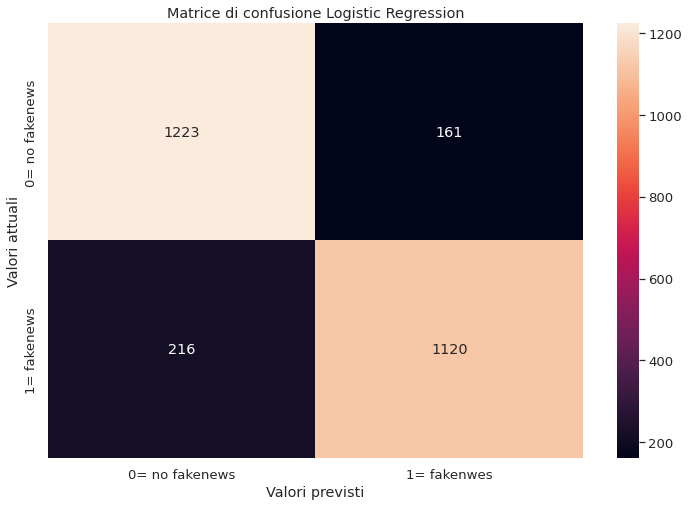

In [ ]:
import seaborn as sns
import pandas as pd
import matplotlib.pyplot as plt


ax= plt.subplot()
sns.heatmap(array, annot=True, fmt='g', ax=ax);  


ax.set_xlabel('');ax.set_ylabel('Valori attuali'); 
ax.set_xlabel('');ax.set_xlabel('Valori previsti'); 

ax.set_title('Matrice di confusione Logistic Regression'); 
ax.xaxis.set_ticklabels(['0= no fakenews', '1= fakenwes']); ax.yaxis.set_ticklabels(['0= no fakenews', '1= fakenews']);

In [ ]:
predizioneFinModelloLogisticRegression

array([1, 1, 0, ..., 0, 1, 0])

In [ ]:
dfresult = dftestl

In [ ]:
dfresult['previsione'] =predizioneFinModelloLogisticRegression.tolist()

In [ ]:
del dfresult["testoStem"]


In [ ]:
dfresult.sample(frac=1)


,text,label,previsione
1730,carcere fino tre anni tradisce partner finalme...,1,1
501,luna filmati quattro ufo superficie cratere ar...,1,1
1557,militare inglese rivela alcuni “incontri ravvi...,1,1
2439,calamaro gigante spiaggiato catania,1,1
1321,interni scopri cosa accade oggi italiapechino ...,0,1
...,...,...,...
26,comune genova rileva forti demanio diventerann...,1,1
1391,rimetto valutazione,0,0
715,francesco oppini gf vip alba parietti dichiara...,0,0
141,quarterback italiano baia sinonimo vittoria se...,0,0


RANDOM FOREST

In [ ]:
from sklearn.ensemble import RandomForestClassifier

In [ ]:
from sklearn.datasets import make_classification

In [ ]:
modelloRandomForest = RandomForestClassifier(n_estimators = 100) 

In [ ]:
modelloRandomForest.fit(X_train_tfidf,y_train)

RandomForestClassifier()

In [ ]:
predizioneValModelloRF = modelloRandomForest.predict(X_test_tfidf)

In [ ]:
from sklearn import metrics
metrics.accuracy_score(y_test, predizioneValModelloRF)

0.7933723196881092

DECISION TREE

In [ ]:
from sklearn.tree import DecisionTreeClassifier

In [ ]:
modelloDecisionTree = DecisionTreeClassifier()

In [ ]:
modelloDecisionTree.fit(X_train_tfidf,y_train)

DecisionTreeClassifier()

In [ ]:
predizioneValModelloDT = modelloDecisionTree.predict(X_test_tfidf)

In [ ]:
from sklearn import metrics
metrics.accuracy_score(y_test, predizioneValModelloDT)

0.7630186577554998

Naive Bayes

In [ ]:
from sklearn.naive_bayes import MultinomialNB


In [ ]:
modelloNaiveBayes = MultinomialNB()


In [ ]:
modelloNaiveBayes.fit(X_train_tfidf,y_train)

MultinomialNB()

In [ ]:
predizioneValModelloNB = modelloNaiveBayes.predict(X_test_tfidf)

In [ ]:
#sul sotto daset di validation
from sklearn import metrics
metrics.accuracy_score(y_test, predizioneValModelloNB)

0.860484544695071

In [ ]:
#sul database di test
predizioneValModelloFinNB = modelloNaiveBayes.predict(test_tfidf)

In [ ]:
#controllo accuratezza sul dataset di test
from sklearn import metrics
metrics.accuracy_score(dftestl['label'], predizioneValModelloFinNB)

0.8588235294117647

In [ ]:
#calcolo recall NB
from sklearn.metrics import recall_score

recall_score(dftestl['label'], predizioneValModelloFinNB,  average='macro')

0.8582992973590391

In [ ]:
from sklearn.metrics import precision_score
precision_score(dftestl['label'],  predizioneValModelloFinNB,  average='macro')


0.860057304472401

In [ ]:
from sklearn.metrics import f1_score
#f1
f1_score(dftestl['label'], predizioneValModelloFinNB, average='macro')

0.8585389399846903

In [ ]:
 from sklearn.metrics import confusion_matrix

In [ ]:
arrayNB=confusion_matrix(dftestl['label'], predizioneValModelloFinNB)
# (tn, fp, fn, tp)
arrayNB

array([[1229,  155],
       [ 229, 1107]])

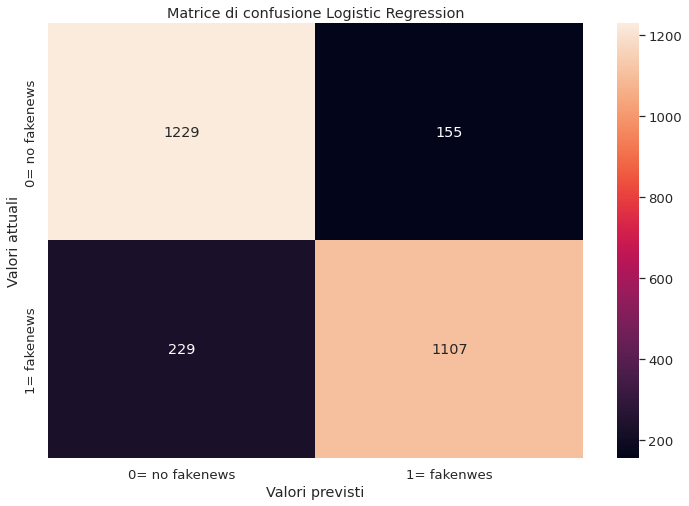

In [ ]:
import seaborn as sns
import pandas as pd
import matplotlib.pyplot as plt


ax= plt.subplot()
sns.heatmap(arrayNB, annot=True, fmt='g', ax=ax);  


ax.set_xlabel('');ax.set_ylabel('Valori attuali'); 
ax.set_xlabel('');ax.set_xlabel('Valori previsti'); 

ax.set_title('Matrice di confusione Logistic Regression'); 
ax.xaxis.set_ticklabels(['0= no fakenews', '1= fakenwes']); ax.yaxis.set_ticklabels(['0= no fakenews', '1= fakenews']);